In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

data = pd.read_csv("C:/Education/Project/ObesityDataSet.csv", sep = ',')
print(data.info())


print(f"Размер датасета: {data.shape}")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")

print("\nТипы данных:")
print(data.dtypes)

# Поиск пропущенных значений
print("Пропущенные значения:")
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
if missing_values.empty:
    print("Пропущенные значения отсутствуют.")
else:
    print(missing_values)



#Проверка пропущенных значений
# print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
# print(data.isnull().sum())

duplicates = data.duplicated().sum()
print(f"\nКоличество явных дубликатов: {duplicates}")
 # Для нечисловых колонок
print("\n=== ОПИСАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===")
print(data.describe(include=['object']))
# Более подробная статистика (что уже сделали)
print("\n=== СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ===")
print(data.describe())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Преобразование столбцов


In [ ]:
categorical_numer = ['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
print("Данные до преобразования:")
print(data[categorical_numer].dtypes)

# Преобразуем в категориальный тип для общего подсчета
for col in categorical_numer:
    data[col] = data[col].astype('category')

print("\nТипы данных после преобразования:")
print(data[categorical_numer].dtypes)

print("\n Обзор данных после преобразования:")
print(data.dtypes)

Данные до преобразования:
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

Типы данных после преобразования:
Height    category
Weight    category
FCVC      category
NCP       category
CH2O      category
FAF       category
TUE       category
dtype: object

 Обзор данных после преобразования:
Gender                              object
Age                                float64
Height                            category
Weight                            category
family_history_with_overweight      object
FAVC                                object
FCVC                              category
NCP                               category
CAEC                                object
SMOKE                               object
CH2O                              category
SCC                                 object
FAF                               category
TUE                               category
CALC         

Анализ выбросов

In [ ]:
# Метод межквартильного размаха (IQR)

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Анализ выбросов для числовых признаков
numeric_columns = data.select_dtypes(include=[np.number]).columns
outliers_summary = {}

print("\nАнализ выбросов (метод IQR):")
for col in numeric_columns:
    outliers = detect_outliers_iqr(data[col])
    outliers_summary[col] = {
        'count': len(outliers),
        'percent': (len(outliers) / len(data)) * 100,
        'outliers': outliers.values
    }
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} выбросов ({outliers_summary[col]['percent']:.2f}%)")





Анализ выбросов (метод IQR):
Age: 168 выбросов (7.96%)


1 способ визуализвции анализа (красивый вид)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

interval columns not set, guessing: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


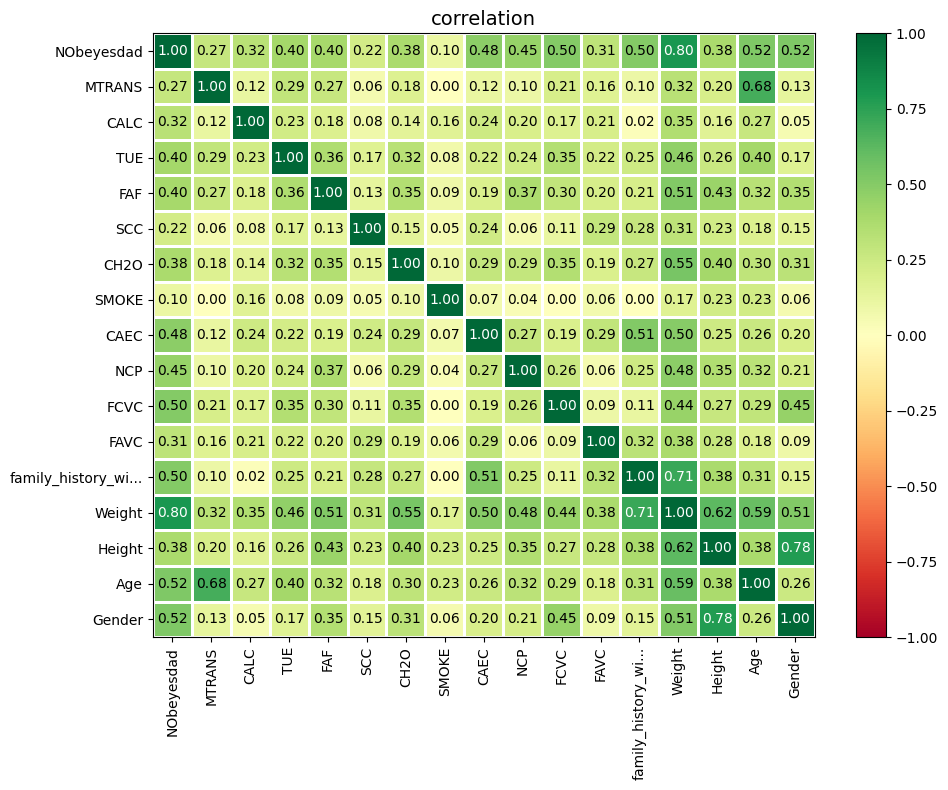

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.pipeline import make_pipeline
# !pip install phik
# import phik
from phik.report import plot_correlation_matrix

corr_matrix = data.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize=(10, 8))

2 способ визуализации анализов

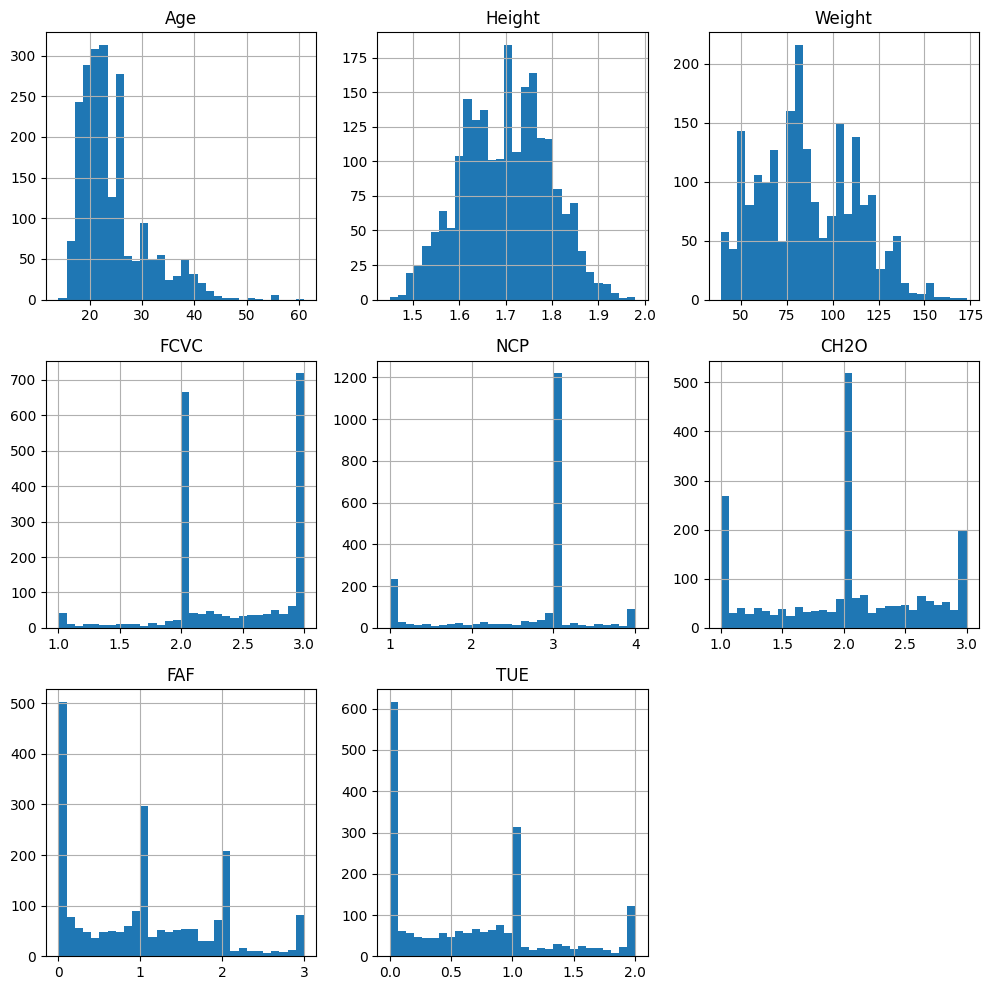

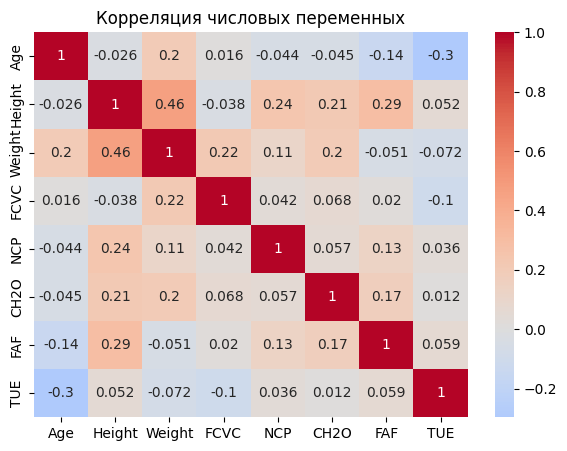

In [3]:
# 10. Гистограммы для числовых колонок
import matplotlib.pyplot as plt

data.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

# 11. Матрица корреляций для числовых данных
import seaborn as sns

plt.figure(figsize=(7, 5))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция числовых переменных')
plt.show()

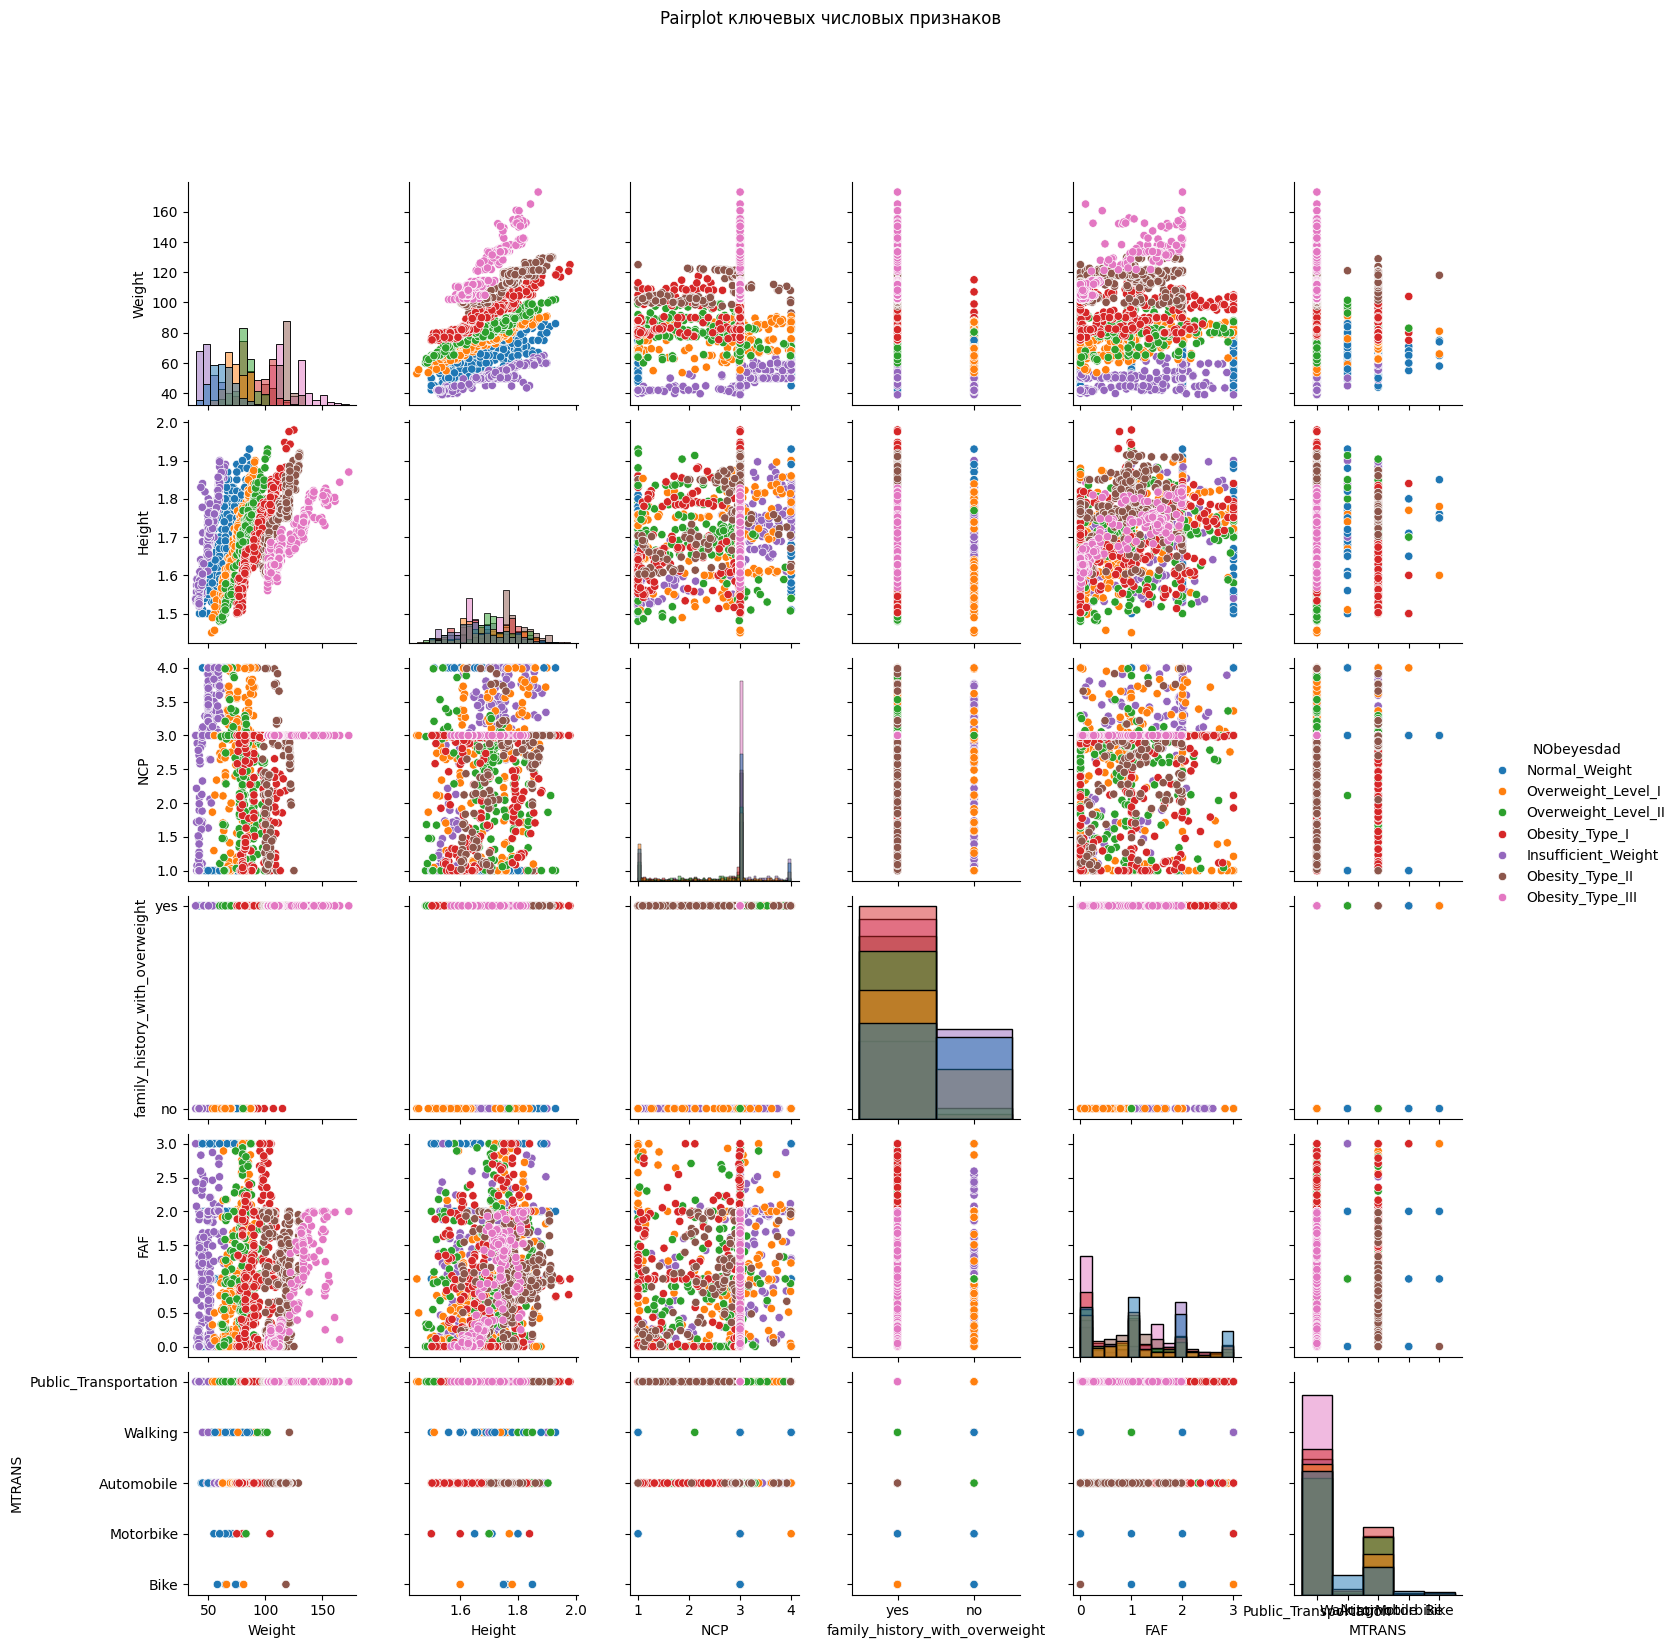

In [5]:
# Выберем наиболее влияющие числовые признаки
key_numeric = ['Weight', 'Height', 'NCP', 'family_history_with_overweight', 'FAF', 'MTRANS']

sns.pairplot(data=data, vars=key_numeric, hue='NObeyesdad', diag_kind='hist')
plt.suptitle('Pairplot ключевых числовых признаков', y=1.1)
plt.show()

Вывод:
1.   Ключевые факторы, которые влияют на прогноз и постановку диагноза ожирение входят:
 Наибольший вклад в прогноз вносят следующие параметры:

А)Weight и Height (вес и рост, эти параметры можно объединить в BMI, для оптимизации модели): Являются объективными и самыми сильными предикторами.

B) family_history_with_overweight: Генетическая предрасположенность подтверждена как критически важный фактор риска ожирения.

C) Пищевые привычки: Частота потребления высококалорийной пищи (FAVC), потребление овощей (FCVC) и количество основных приемов пищи (NCP) являются значимыми поведенческими маркерами.

D) Физическая активность: Параметр FAF (физическая активность) четко коррелирует с уровнем риска развития ожирения.

C)Тип транспорта или способ передвижения (MTRANS - особенно малоподвижные варианты, как автомобиль) были идентифицированы как значимые факторы образа жизни, способствующие набору веса.

2.  Практическая значимость и применение данной модели.

Разработанная модель представляет собой готовый инструмент для скрининга, не требующий сложных медицинских обследований. На основе простого анкетирования по указанным параметрам система может:

Классифицировать индивидуумов по категориям веса с высокой точностью.

Выявлять лиц из групп риска (категории Overweight_Level_I, II) для своевременной профилактики.

Формировать персонализированные рекомендации по коррекции питания (FAVC, FCVC, NCP), повышению физической активности (FAF) и изменению повседневных привычек (TUE, MTRANS).

4. Направления для дальнейшего развития.

Для повышения универсальности и точности модели перспективным является:

Расширение набора данных, включение в него биохимических показателей (уровень глюкозы, холестерина).

Более детальная градация поведенческих факторов (например, не просто "да/нет" для FAVC, а шкала частоты).


Заключение:
Таким образом, созданная модель является эффективным и надежным инструментом для прогнозирования и классификации ожирения. Ее внедрение в практику врачей-диетологов, эндокринологов, а также в корпоративные программы здоровья и мобильные приложения позволит перейти к персонализированной, превентивной медицине в борьбе с эпидемией ожирения.